In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm
from scipy import stats
%matplotlib inline

In [2]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [3]:
ZRI = pd.read_csv('./data/Zip_Zri_MultiFamilyResidenceRental.csv', index_col=0,dtype={'RegionName': 'str'})

In [4]:
ZRI.shape

(1861, 119)

In [5]:
#melt zri dataframe
ZRI_f = pd.melt(ZRI, id_vars =['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], value_vars=ZRI.iloc[:,6:119])


In [6]:
ZRI_f[ZRI_f.value == 0]

Empty DataFrame
Columns: [RegionName, City, State, Metro, CountyName, SizeRank, variable, value]
Index: []

In [7]:
ZRI_f.columns[ZRI_f.isnull().any()]

Index(['Metro', 'value'], dtype='object')

Text(0.5, 1.0, 'ZRI Distribution')

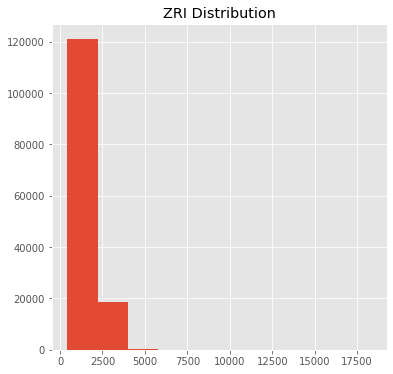

In [8]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('ZRI Distribution')

In [9]:
print('Rent Mean: ', np.mean(ZRI_f.value))
print('Rent Median: ', (ZRI_f.value).median())

upper_lim = np.mean(ZRI_f.value) + 3 * np.std(ZRI_f.value)
lower_lim = np.mean(ZRI_f.value) - 3 * np.std(ZRI_f.value)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

Rent Mean:  1518.0649123433427
Rent Median:  1395.0
Outliers are above 3436.70 and below -400.57


Text(0.5, 1.0, 'Log Rent Distribution')

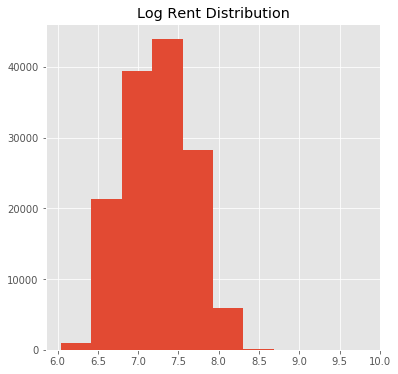

In [10]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution')

In [11]:
print('Log Rent Mean: %.1f' % np.mean(ZRI_f['LogValue']))

upper_lim = np.mean(ZRI_f['LogValue']) + 3.5 * np.std(ZRI_f['LogValue'])
lower_lim = np.mean(ZRI_f['LogValue']) - 3.5 * np.std(ZRI_f['LogValue'])
print('Outliers are above %.1f and below %.1f' % (upper_lim, lower_lim))

Log Rent Mean: 7.2
Outliers are above 8.7 and below 5.8


In [12]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

RegionName       City State                        Metro  \
181886      11901  Riverhead    NY  New York-Newark-Jersey City   
200496      11901  Riverhead    NY  New York-Newark-Jersey City   
161415      11901  Riverhead    NY  New York-Newark-Jersey City   
168859      11901  Riverhead    NY  New York-Newark-Jersey City   
170720      11901  Riverhead    NY  New York-Newark-Jersey City   

            CountyName  SizeRank variable    value  LogValue  
181886  Suffolk County      1370  2018-10  18349.0  9.817330  
200496  Suffolk County      1370  2019-08  17943.0  9.794955  
161415  Suffolk County      1370  2017-11  15445.0  9.645041  
168859  Suffolk County      1370  2018-03  13434.0  9.505544  
170720  Suffolk County      1370  2018-04  13427.0  9.505023

In [13]:
ZRI_f[ZRI_f.LogValue < 5.8].sort_values('LogValue', ascending=False)

Empty DataFrame
Columns: [RegionName, City, State, Metro, CountyName, SizeRank, variable, value, LogValue]
Index: []

In [14]:
#remove outliers
ZRI_f = ZRI_f[(ZRI_f.LogValue < 8.7)]

In [15]:
#remove outliers
ZRI_f = ZRI_f[(ZRI_f.value < 3436.70)]

In [16]:
ZRI_f[ZRI_f.LogValue > 8.7].sort_values('LogValue', ascending=False)

Empty DataFrame
Columns: [RegionName, City, State, Metro, CountyName, SizeRank, variable, value, LogValue]
Index: []

Text(0.5, 1.0, 'Log Rent Distribution Outliers Removed')

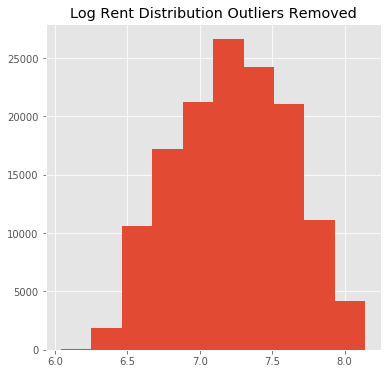

In [17]:
ZRI_f['LogValue'] = np.log(ZRI_f.value)
plt.figure(figsize=(6,6))
ZRI_f['LogValue'].hist()
plt.title('Log Rent Distribution Outliers Removed')

Text(0.5, 1.0, 'Rent Distribution')

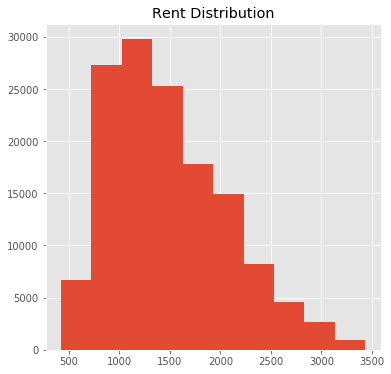

In [18]:
plt.figure(figsize=(6,6))
ZRI_f['value'].hist()
plt.title('Rent Distribution')

In [19]:
ZRI_f.head()

RegionName      City State                        Metro       CountyName  \
0      10025  New York    NY  New York-Newark-Jersey City  New York County   
1      60657   Chicago    IL     Chicago-Naperville-Elgin      Cook County   
2      10023  New York    NY  New York-Newark-Jersey City  New York County   
4      60614   Chicago    IL     Chicago-Naperville-Elgin      Cook County   
8      79936   El Paso    TX                      El Paso   El Paso County   

   SizeRank variable   value  LogValue  
0         1  2010-09  2930.0  7.982758  
1         2  2010-09  1447.0  7.277248  
2         3  2010-09  2797.0  7.936303  
4         5  2010-09  1437.0  7.270313  
8         9  2010-09   982.0  6.889591

In [20]:
ZRI_f['variable'] = pd.to_datetime(ZRI_f['variable'])
ZRI_f['Month'] = ZRI_f['variable'].dt.month
ZRI_f['Year'] = ZRI_f['variable'].dt.year

In [21]:
ZRI_f.head()

RegionName      City State                        Metro       CountyName  \
0      10025  New York    NY  New York-Newark-Jersey City  New York County   
1      60657   Chicago    IL     Chicago-Naperville-Elgin      Cook County   
2      10023  New York    NY  New York-Newark-Jersey City  New York County   
4      60614   Chicago    IL     Chicago-Naperville-Elgin      Cook County   
8      79936   El Paso    TX                      El Paso   El Paso County   

   SizeRank   variable   value  LogValue  Month  Year  
0         1 2010-09-01  2930.0  7.982758      9  2010  
1         2 2010-09-01  1447.0  7.277248      9  2010  
2         3 2010-09-01  2797.0  7.936303      9  2010  
4         5 2010-09-01  1437.0  7.270313      9  2010  
8         9 2010-09-01   982.0  6.889591      9  2010

Text(0.5, 1.0, 'Avg Yearly Rent')

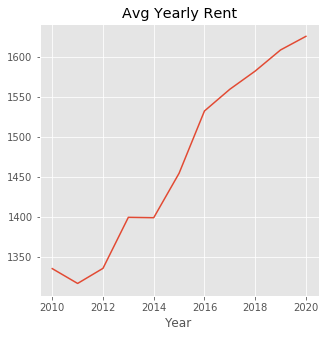

In [22]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Year').agg({'value':'mean'})['value'].plot()
plt.title('Avg Yearly Rent')

Text(0.5, 1.0, 'Avg Yearly Rent')

<Figure size 360x360 with 0 Axes>

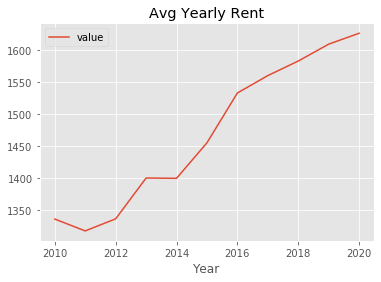

In [23]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Year').agg({'value':'mean'}).plot()
plt.title('Avg Yearly Rent')

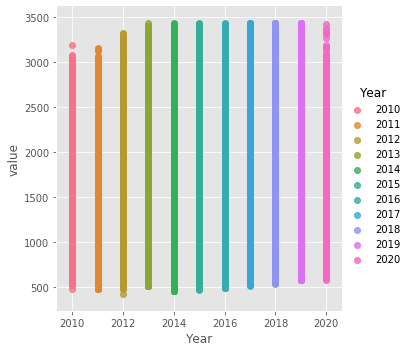

In [24]:
sns.lmplot("Year", "value", ZRI_f, hue="Year")

Text(0.5, 1.0, 'Avg Monthly Rent')

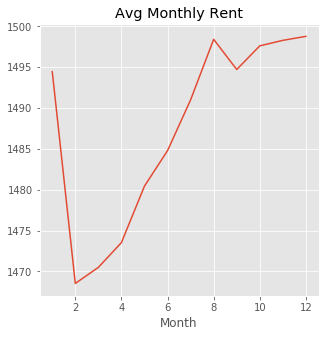

In [25]:
plt.figure(figsize=(5,5))
ZRI_f.groupby('Month').agg({'value':'mean'})['value'].plot()
plt.title('Avg Monthly Rent')

In [26]:
#Add season feature 

def month_to_season(month):
    if month in range(3,5):
        month = 'spring'
    elif month in range(6,8):
        month = 'summer'
    elif month in range(9,11):
        month = 'fall'
    else:
        month = 'winter'
    return(month)

ZRI_f['Season'] = ZRI_f.Month.apply(month_to_season)

In [27]:
ZRI_f.head()

RegionName      City State                        Metro       CountyName  \
0      10025  New York    NY  New York-Newark-Jersey City  New York County   
1      60657   Chicago    IL     Chicago-Naperville-Elgin      Cook County   
2      10023  New York    NY  New York-Newark-Jersey City  New York County   
4      60614   Chicago    IL     Chicago-Naperville-Elgin      Cook County   
8      79936   El Paso    TX                      El Paso   El Paso County   

   SizeRank   variable   value  LogValue  Month  Year Season  
0         1 2010-09-01  2930.0  7.982758      9  2010   fall  
1         2 2010-09-01  1447.0  7.277248      9  2010   fall  
2         3 2010-09-01  2797.0  7.936303      9  2010   fall  
4         5 2010-09-01  1437.0  7.270313      9  2010   fall  
8         9 2010-09-01   982.0  6.889591      9  2010   fall

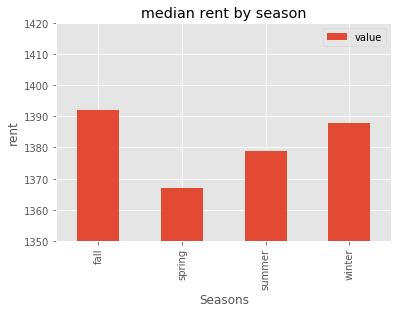

In [28]:
season_rent = ZRI_f.groupby(['Season']).agg({"value": 'median'})

season_rent.plot.bar()
plt.title('median rent by season')
plt.xlabel('Seasons')
plt.ylabel('rent')
plt.ylim(1350,1420)
plt.show()

In [29]:
# calling in other dataframes to get features

zri = pd.read_csv('./data/df4.csv', index_col=0)




/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,8,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
zri.head()

ZIPCODE   value  Month    Year  total_pop City State Metro CountyName  \
0    60657  1723.0      1  2019.0    70052.0  NaN   NaN   NaN        NaN   
1    77494  1255.0      1  2019.0   114989.0  NaN   NaN   NaN        NaN   
2    60614  1872.0      1  2019.0    71308.0  NaN   NaN   NaN        NaN   
3    77084  1326.0      1  2019.0   107700.0  NaN   NaN   NaN        NaN   
4    79936   898.0      1  2019.0   112355.0  NaN   NaN   NaN        NaN   

   SizeRank Year-Month  Season  AGIncome  TotIncome  SalariesWages  \
0       NaN        NaN     NaN       NaN        NaN            NaN   
1       NaN        NaN     NaN       NaN        NaN            NaN   
2       NaN        NaN     NaN       NaN        NaN            NaN   
3       NaN        NaN     NaN       NaN        NaN            NaN   
4       NaN        NaN     NaN       NaN        NaN            NaN   

   NumUnemply  TotTaxes  FIPSCode  Labor\nForce  Employed  Unemployed  \
0         NaN       NaN       NaN           NaN       NaN         NaN   
1         NaN       NaN       NaN           NaN       NaN         NaN   
2         NaN       NaN       NaN           NaN       NaN         NaN   
3         NaN       NaN       NaN           NaN       NaN         NaN   
4         NaN       NaN       NaN           NaN       NaN         NaN   

   Unemploy-\nment Rate\n(%)  MortDeliq30-89  MortDeliq90  geo_id  median_age  \
0                        NaN             NaN          NaN     NaN         NaN   
1                        NaN             NaN          NaN     NaN         NaN   
2                        NaN             NaN          NaN     NaN         NaN   
3                        NaN             NaN          NaN     NaN         NaN   
4                        NaN             NaN          NaN     NaN         NaN   

   white_pop  black_pop  asian_pop  hispanic_pop  gini_index  \
0        NaN        NaN        NaN           NaN         NaN   
1        NaN        NaN        NaN           NaN         NaN   
2        NaN        NaN        NaN           NaN         NaN   
3        NaN        NaN        NaN           NaN         NaN   
4        NaN        NaN        NaN           NaN         NaN   

   income_per_capita  vacant_housing_units_for_rent  \
0                NaN                            NaN   
1                NaN                            NaN   
2                NaN                            NaN   
3                NaN                            NaN   
4                NaN                            NaN   

   housing_units_renter_occupied  percent_income_spent_on_rent  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

   high_school_diploma  associates_degree  bachelors_degree  masters_degree  \
0                  NaN                NaN               NaN             NaN   
1                  NaN                NaN               NaN             NaN   
2                  NaN                NaN               NaN             NaN   
3                  NaN                NaN               NaN             NaN   
4                  NaN                NaN               NaN             NaN   

   rental_units_supply  year  population_change  income_change  supply_change  \
0                  NaN   NaN                NaN            NaN            NaN   
1                  NaN   NaN                NaN            NaN            NaN   
2                  NaN   NaN                NaN            NaN            NaN   
3                  NaN   NaN                NaN            NaN            NaN   
4                  NaN   NaN                NaN            NaN            NaN   

   natural_amenity_rank  
0                   NaN  
1                   NaN  
2                   NaN  
3                   

In [31]:
zri['MortDeliq30-89'] = zri['MortDeliq30-89'].fillna(zri['MortDeliq30-89'].mean())
zri['MortDeliq90'] = zri['MortDeliq90'].fillna(zri['MortDeliq90'].mean())
zri['education'] = zri['high_school_diploma'] + zri['associates_degree'] * 2 + zri['bachelors_degree'] * 3 +zri['masters_degree']* 4

In [32]:
zri['AGIncome'] = (zri['AGIncome']*1000)/zri['total_pop']
zri['TotIncome'] = (zri['TotIncome']*1000)/zri['total_pop']
zri['SalariesWages'] = (zri['SalariesWages']*1000)/zri['total_pop']
zri['NumUnemply'] =(zri['NumUnemply']*1000)/zri['total_pop']
zri['TotTaxes'] = (zri['TotTaxes']*1000)/zri['total_pop']

In [33]:
zri.income_change = zri.income_change.fillna(0)

In [34]:
# #Log Transformation:
zri['LogValue'] = np.log(zri.value)
zri['LogTotTaxes'] = np.log(zri.TotTaxes)
zri['Logincome_per_capita'] = np.log(zri.income_per_capita)

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [35]:
train = pd.merge(zri.loc[zri['Year']==2015].rename(columns = {'LogValue' : 'LogValue_2015'}),
                 zri.loc[zri['Year']==2018][['ZIPCODE', 'Month','LogValue']],
                 how = 'left', on = ['ZIPCODE', 'Month'])
test = pd.merge(zri.loc[zri['Year']==2016].rename(columns = {'LogValue' : 'LogValue_2016'}),
                zri.loc[zri['Year']==2019][['ZIPCODE', 'Month','LogValue']],
                how = 'left', on = ['ZIPCODE', 'Month'])

In [36]:
#drop columns to test

dropped = ['SizeRank', 'City', 'State', 'Metro', 'CountyName',\
        'Month','Year','Labor\nForce','Employed', 'Unemployed',\
        'Year-Month', 'FIPSCode', 'geo_id',\
        'year'] #'ZIPCODE'

train.drop(columns = dropped, inplace=True)
test.drop(columns = dropped, inplace=True)

In [37]:
train = train.dropna(subset=['LogValue'])
test = test.dropna(subset=['LogValue'])

In [38]:
X_train = train.drop(columns = ['LogValue'])
y_train = train['LogValue']
X_test = test.drop(columns = ['LogValue'])
y_test = test['LogValue']

In [39]:
# from sklearn.linear_model import LinearRegression
# continuous_features = ['LogValue_2015', 'Season', 'LogTotTaxes',
#        'MortDeliq90', 'gini_index',
#        'black_pop', 'asian_pop', 'white_pop',
#        'vacant_housing_units_for_rent', 
#        'natural_amenity_rank']
# scores = {}
# ols4 = LinearRegression()
# from sklearn.metrics import r2_score
# for feature_name in continuous_features:
#                 df2     = train.copy()
#                 feature = df2[feature_name].copy()
#                 df2.drop(feature_name, axis=1, inplace=True)
#                 ols4.fit(df2, feature)
#                 scores[feature_name] = ols4.score(df2, feature)  

In [40]:
# sns.barplot(x='R2', y='index', data=pd.DataFrame(scores, index=['R2'])\
#             .T.reset_index())
# plt.title('$R^2$ of a continuous feature against the other features')

Text(0.5, 1.0, 'Feature Importance to ZRI')

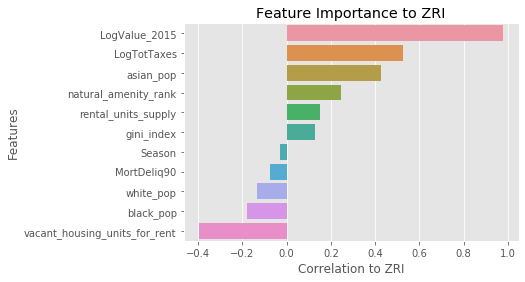

In [41]:
features = ['LogValue_2015', 'Season', 'LogTotTaxes',
       'MortDeliq90', 'gini_index',
       'black_pop', 'asian_pop', 'white_pop',
       'vacant_housing_units_for_rent', 
       'natural_amenity_rank', 'rental_units_supply']
corr = train[['value'] + features].corr()

corr = corr.sort_values('value', ascending=False)
sns.barplot( corr.value[1:], corr.index[1:], orient='h')
plt.xlabel("Correlation to ZRI")
plt.ylabel("Features")
plt.title("Feature Importance to ZRI")

Text(0.5, 1.0, 'Feature Importance to ZRI')

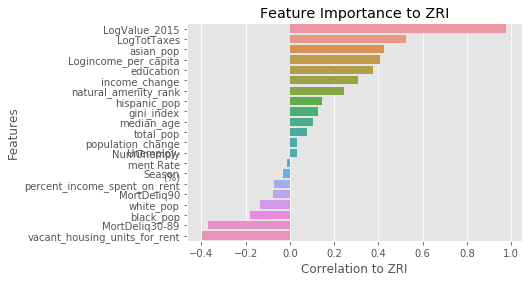

In [42]:
features = ['LogValue_2015', 'Season', 'NumUnemply', 'LogTotTaxes',
       'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89', 'MortDeliq90',
       'total_pop', 'median_age', 'white_pop', 'black_pop', 'asian_pop',
       'hispanic_pop', 'gini_index', 'Logincome_per_capita',
       'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
       'population_change', 'income_change', 'natural_amenity_rank',
       'education']
corr = train[['value'] + features].corr()

corr = corr.sort_values('value', ascending=False)
sns.barplot( corr.value[1:], corr.index[1:], orient='h')
plt.xlabel("Correlation to ZRI")
plt.ylabel("Features")
plt.title("Feature Importance to ZRI")

In [43]:
#create a single data frame with both features and target by concatonating
train_df=pd.concat([X_train, y_train], axis=1)
train_df.head()

ZIPCODE   value  total_pop  Season      AGIncome     TotIncome  \
0    60657  1672.0    69147.0     2.0  12143.804744  12342.256352   
2    77494  1137.0    88077.0     2.0  10919.369794  11021.153839   
3    60614  1822.0    69423.0     2.0  18711.334860  19014.680533   
4    79936   952.0   113887.0     2.0   3094.090341   3126.820152   
5    60640  1399.0    66050.0     2.0   5980.890739   6084.834721   

   SalariesWages  NumUnemply     TotTaxes  Unemploy-\nment Rate\n(%)  \
0    8710.888879    2.289808   572.989428                        6.2   
2    9210.541155    2.800580   507.302323                        4.3   
3   10475.034691    1.776549  1059.466363                        6.2   
4    2519.795938    2.487846    71.968999                        5.2   
5    4709.124401    2.750442   231.617462                        6.2   

   MortDeliq30-89  MortDeliq90  median_age  white_pop  black_pop  asian_pop  \
0        2.300000     3.000000        30.9   0.815625   0.026682   0.071471   
2        2.220667     2.396746        34.4   0.581662   0.062797   0.155716   
3        2.300000     3.000000        30.1   0.804186   0.043573   0.057157   
4        4.500000     2.100000        31.2   0.111496   0.015401   0.009632   
5        2.300000     3.000000        37.4   0.542195   0.192627   0.104966   

   hispanic_pop  gini_index  income_per_capita  vacant_housing_units_for_rent  \
0      0.060639      0.5041            65121.0                       0.053914   
2      0.173303      0.3454            47454.0                       0.030479   
3      0.066750      0.5235            70514.0                       0.028165   
4      0.853346      0.4264            21567.0                       0.069657   
5      0.122316      0.5263            38726.0                       0.067138   

   housing_units_renter_occupied  percent_income_spent_on_rent  \
0                        23111.0                          26.4   
2                         4167.0                          23.5   
3                        19357.0                          24.5   
4                        10578.0                          30.6   
5                        23746.0                          28.9   

   high_school_diploma  associates_degree  bachelors_degree  masters_degree  \
0             0.032742           0.027232          0.356183        0.168265   
2             0.046845           0.046028          0.242833        0.099231   
3             0.033692           0.014865          0.334558        0.156634   
4             0.117801           0.047986          0.106395        0.031689   
5             0.107888           0.041847          0.260802        0.124481   

   rental_units_supply  population_change  income_change  supply_change  \
0              24428.0           1.659193       2.005538       4.827290   
2               4298.0         120.653315      -0.747339       7.735772   
3              19918.0          13.406101       5.107223      54.949438   
4              11370.0           3.742130       0.699126       0.886511   
5              25455.0          11.424755       0.869828      42.438567   

   natural_amenity_rank  education  LogValue_2015  LogTotTaxes  \
0                   3.0   1.828814       7.421776     6.350867   
2                   3.0   1.264326       7.036148     6.229107   
3                   3.0   1.693632       7.507690     6.965521   
4                   5.0   0.659715       6.858565     4.276235   
5                   3.0   1.471915       7.243513     5.445087   

   Logincome_per_capita  LogValue  
0             11.084002  7.458763  
2             10.767516  7.101676  
3             11.163567  7.515345  
4              9.978920  6.800170  
5             10.564266  7.288244

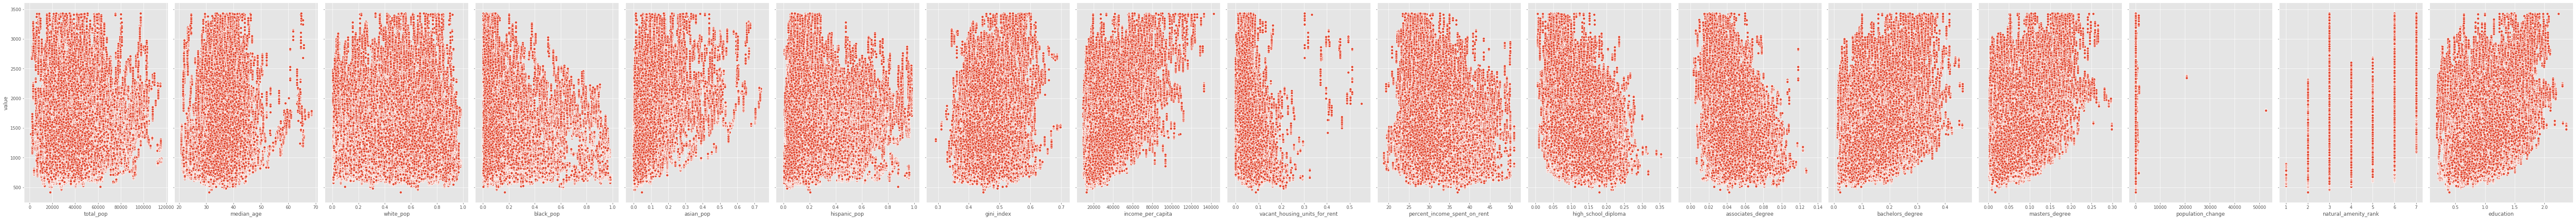

In [44]:
# p = sns.pairplot(zri, x_vars=['total_pop', 'median_age', 'white_pop', 'black_pop',
#        'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
#        'vacant_housing_units_for_rent', 'percent_income_spent_on_rent',
#        'high_school_diploma', 'associates_degree', 'bachelors_degree',
#        'masters_degree', 'population_change', 'natural_amenity_rank',
#                              'education'], y_vars='value', height=7, aspect=0.7)

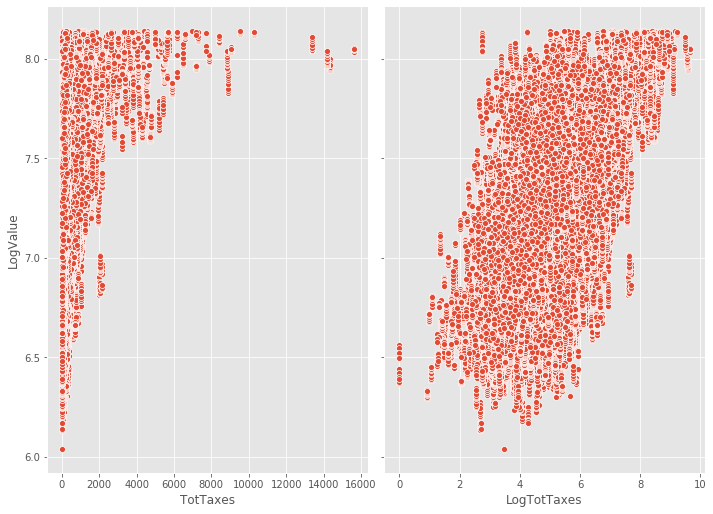

In [45]:
p = sns.pairplot(zri, x_vars=['TotTaxes',
                             'LogTotTaxes'], y_vars='LogValue', height=7, aspect=0.7)

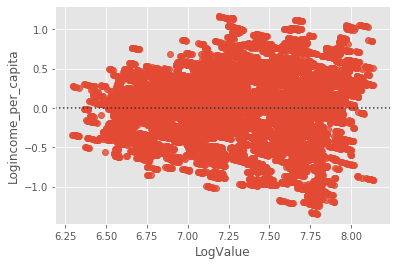

In [46]:
# simple plot of residuals
import seaborn as sns

sns.residplot('LogValue', 'Logincome_per_capita', data=train_df)

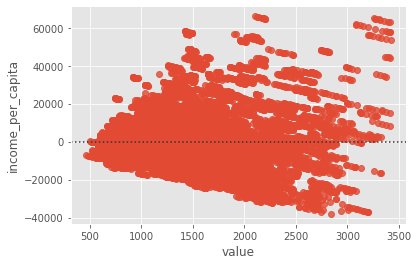

In [47]:
# simple plot of residuals
import seaborn as sns

sns.residplot('value', 'income_per_capita', data=train_df)

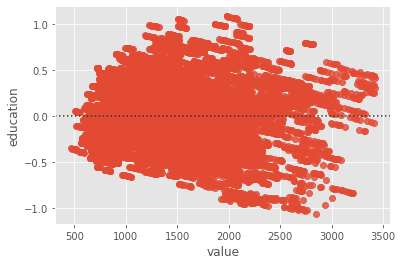

In [48]:
# simple plot of residuals
import seaborn as sns

sns.residplot('value', 'education', data=train_df)

In [49]:
# res_x = [target/1000 for target in expo(y)]
# res_y = [(target - predict)/1000 for (target, predict) in zip(expo(y), expo(lm.predict(x)))]
# plt.figure(figsize=(8,8))
# plt.scatter(res_x, res_y, alpha = 0.5)
# plt.title('Distribution of Residuals')
# plt.xlabel('Actual House Price in $K')
# plt.ylabel('Residual House Price in $K')

In [50]:
train_df.columns

Index(['ZIPCODE', 'value', 'total_pop', 'Season', 'AGIncome', 'TotIncome',
       'SalariesWages', 'NumUnemply', 'TotTaxes', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'rental_units_supply', 'population_change', 'income_change',
       'supply_change', 'natural_amenity_rank', 'education', 'LogValue_2015',
       'LogTotTaxes', 'Logincome_per_capita', 'LogValue'],
      dtype='object')

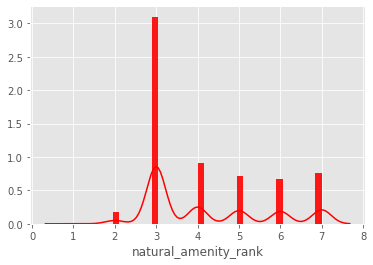

In [51]:
sns.distplot((train_df['natural_amenity_rank']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

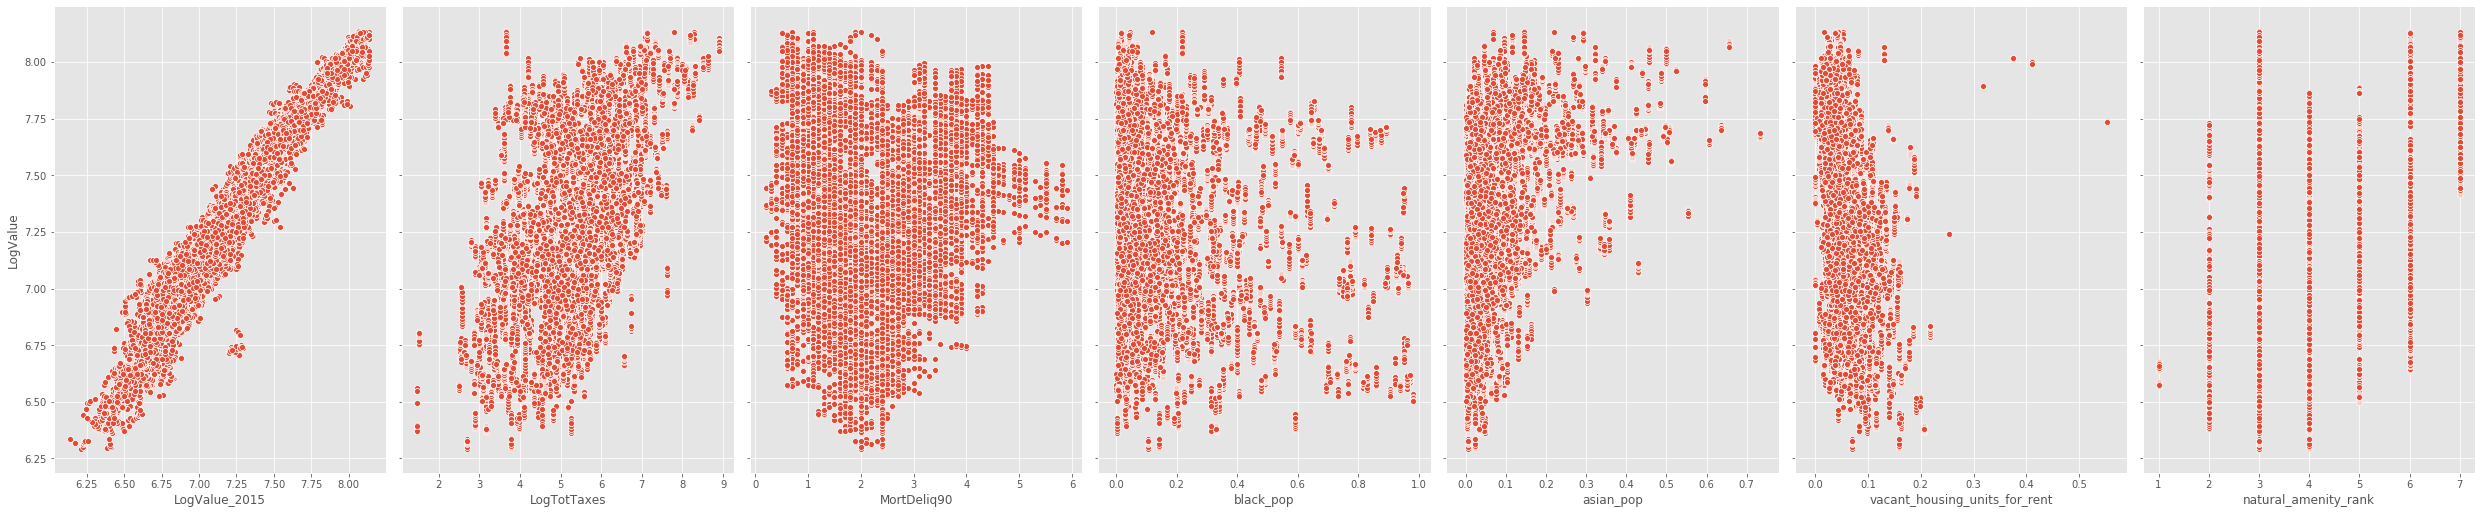

In [52]:
p = sns.pairplot(train_df, x_vars=['LogValue_2015', 'LogTotTaxes', 'MortDeliq90', 'black_pop',
    'asian_pop', 'vacant_housing_units_for_rent', 'natural_amenity_rank'], y_vars='LogValue', height=7, aspect=0.7)



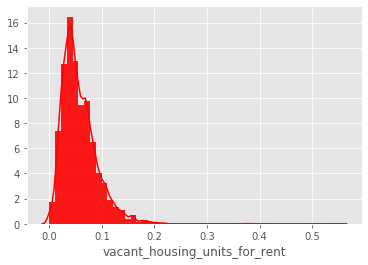

In [53]:
sns.distplot((train_df['vacant_housing_units_for_rent']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

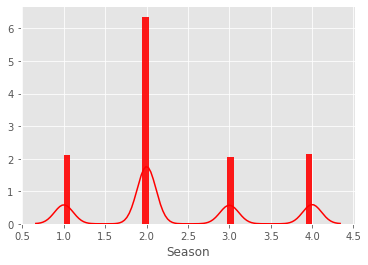

In [54]:
sns.distplot((train_df['Season']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

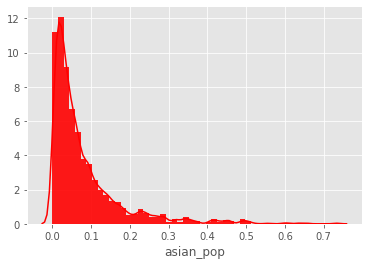

In [55]:
sns.distplot((train_df['asian_pop']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

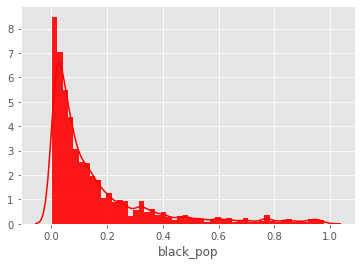

In [56]:
sns.distplot((train_df['black_pop']), kde = True, color = 'r', hist_kws={'alpha': 0.9})

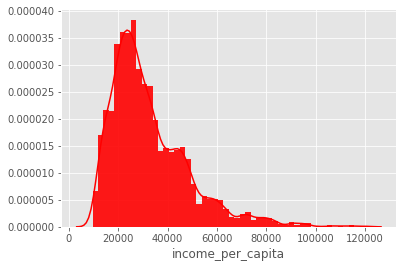

In [57]:
sns.distplot((train_df['income_per_capita']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


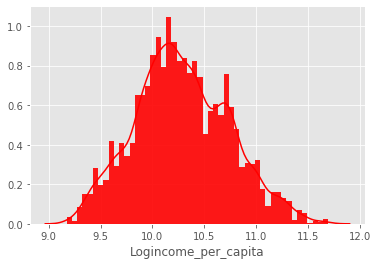

In [58]:
sns.distplot((train_df['Logincome_per_capita']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


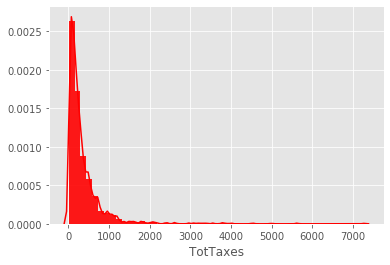

In [59]:
sns.distplot((train_df['TotTaxes']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


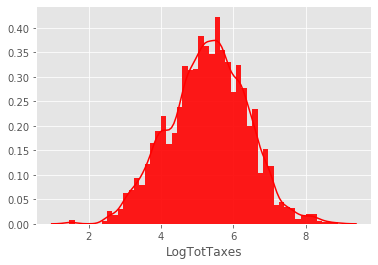

In [60]:
sns.distplot((train_df['LogTotTaxes']), kde = True, color = 'r', hist_kws={'alpha': 0.9})


In [61]:
# # Create correlation matrix and print it
# cor = zri.corr()
# # print(cor)

# # Correlation matrix heatmap
# plt.figure()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

# # Correlation with output variable
# cor_target = abs(cor["LogValue"])

# # Selecting highly correlated features
# best_features = cor_target[cor_target > .5]
# print(best_features)

In [62]:
Testing1 = zri.copy()

In [63]:
Testing1.columns

Index(['ZIPCODE', 'value', 'Month', 'Year', 'total_pop', 'City', 'State',
       'Metro', 'CountyName', 'SizeRank', 'Year-Month', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'FIPSCode',
       'Labor\nForce', 'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)',
       'MortDeliq30-89', 'MortDeliq90', 'geo_id', 'median_age', 'white_pop',
       'black_pop', 'asian_pop', 'hispanic_pop', 'gini_index',
       'income_per_capita', 'vacant_housing_units_for_rent',
       'housing_units_renter_occupied', 'percent_income_spent_on_rent',
       'high_school_diploma', 'associates_degree', 'bachelors_degree',
       'masters_degree', 'rental_units_supply', 'year', 'population_change',
       'income_change', 'supply_change', 'natural_amenity_rank', 'education',
       'LogValue', 'LogTotTaxes', 'Logincome_per_capita'],
      dtype='object')

In [64]:
Testing1 = Testing1.drop(columns =['ZIPCODE', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])

In [65]:
Testing1 = Testing1.drop(columns =['Year-Month'])

In [66]:
Testing1 = Testing1.drop(columns =['FIPSCode'])

In [67]:
Testing1.columns

Index(['value', 'Month', 'Year', 'total_pop', 'Season', 'AGIncome',
       'TotIncome', 'SalariesWages', 'NumUnemply', 'TotTaxes', 'Labor\nForce',
       'Employed', 'Unemployed', 'Unemploy-\nment Rate\n(%)', 'MortDeliq30-89',
       'MortDeliq90', 'geo_id', 'median_age', 'white_pop', 'black_pop',
       'asian_pop', 'hispanic_pop', 'gini_index', 'income_per_capita',
       'vacant_housing_units_for_rent', 'housing_units_renter_occupied',
       'percent_income_spent_on_rent', 'high_school_diploma',
       'associates_degree', 'bachelors_degree', 'masters_degree',
       'rental_units_supply', 'year', 'population_change', 'income_change',
       'supply_change', 'natural_amenity_rank', 'education', 'LogValue',
       'LogTotTaxes', 'Logincome_per_capita'],
      dtype='object')

In [68]:
Testing1 = Testing1.apply(pd.to_numeric)

In [69]:
Testing1.head()

value  Month    Year  total_pop  Season  AGIncome  TotIncome  \
0  1723.0      1  2019.0    70052.0     NaN       NaN        NaN   
1  1255.0      1  2019.0   114989.0     NaN       NaN        NaN   
2  1872.0      1  2019.0    71308.0     NaN       NaN        NaN   
3  1326.0      1  2019.0   107700.0     NaN       NaN        NaN   
4   898.0      1  2019.0   112355.0     NaN       NaN        NaN   

   SalariesWages  NumUnemply  TotTaxes  Labor\nForce  Employed  Unemployed  \
0            NaN         NaN       NaN           NaN       NaN         NaN   
1            NaN         NaN       NaN           NaN       NaN         NaN   
2            NaN         NaN       NaN           NaN       NaN         NaN   
3            NaN         NaN       NaN           NaN       NaN         NaN   
4            NaN         NaN       NaN           NaN       NaN         NaN   

   Unemploy-\nment Rate\n(%)  MortDeliq30-89  MortDeliq90  geo_id  median_age  \
0                        NaN        2.220667     2.396746     NaN         NaN   
1                        NaN        2.220667     2.396746     NaN         NaN   
2                        NaN        2.220667     2.396746     NaN         NaN   
3                        NaN        2.220667     2.396746     NaN         NaN   
4                        NaN        2.220667     2.396746     NaN         NaN   

   white_pop  black_pop  asian_pop  hispanic_pop  gini_index  \
0        NaN        NaN        NaN           NaN         NaN   
1        NaN        NaN        NaN           NaN         NaN   
2        NaN        NaN        NaN           NaN         NaN   
3        NaN        NaN        NaN           NaN         NaN   
4        NaN        NaN        NaN           NaN         NaN   

   income_per_capita  vacant_housing_units_for_rent  \
0                NaN                            NaN   
1                NaN                            NaN   
2                NaN                            NaN   
3                NaN                            NaN   
4                NaN                            NaN   

   housing_units_renter_occupied  percent_income_spent_on_rent  \
0                            NaN                           NaN   
1                            NaN                           NaN   
2                            NaN                           NaN   
3                            NaN                           NaN   
4                            NaN                           NaN   

   high_school_diploma  associates_degree  bachelors_degree  masters_degree  \
0                  NaN                NaN               NaN             NaN   
1                  NaN                NaN               NaN             NaN   
2                  NaN                NaN               NaN             NaN   
3                  NaN                NaN               NaN             NaN   
4                  NaN                NaN               NaN             NaN   

   rental_units_supply  year  population_change  income_change  supply_change  \
0                  NaN   NaN                NaN            0.0            NaN   
1                  NaN   NaN                NaN            0.0            NaN   
2                  NaN   NaN                NaN            0.0            NaN   
3                  NaN   NaN                NaN            0.0            NaN   
4                  NaN   NaN                NaN            0.0            NaN   

   natural_amenity_rank  education  LogValue  LogTotTaxes  \
0                   NaN        NaN  7.451822          NaN   
1                   NaN        NaN  7.134891          NaN   
2                   NaN        NaN  7.534763          NaN   
3                   NaN        NaN  7.189922          NaN   
4                   NaN        NaN  6.800170          NaN   

   Logincome_per_capita  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN

In [70]:
Testing1 = Testing1.dropna(subset=['value'])

In [71]:
Testing1 = Testing1[Testing1.Year > 2010]

In [72]:
Testing1 = Testing1[Testing1.Year < 2019]

In [73]:
X = Testing1.drop(columns =["value"]) 
y = Testing1.value


In [74]:
X = X.replace(np.nan, 0)


In [75]:
# # Import modules
# from sklearn.svm import SVR
# from sklearn.feature_selection import RFECV

# # Instantiate estimator and feature selector
# svr_mod = SVR(kernel="linear")
# feat_selector = RFECV(svr_mod, cv=2)

# # Fit
# feat_selector = feat_selector.fit(X, y)

# # Print support and ranking
# print(feat_selector.support_)
# print(feat_selector.ranking_)
# print(X.columns)

In [76]:
# look into features correlations 


In [77]:
corr = pd.concat([X_train, y_train], axis=1).corr()
corr

ZIPCODE     value  total_pop    Season  \
ZIPCODE                        1.000000  0.008464   0.112649 -0.003535   
value                          0.008464  1.000000   0.076539 -0.029025   
total_pop                      0.112649  0.076539   1.000000  0.002172   
Season                        -0.003535 -0.029025   0.002172  1.000000   
AGIncome                       0.094173  0.402980  -0.259563  0.002122   
TotIncome                      0.094692  0.403107  -0.260299  0.002104   
SalariesWages                  0.096865  0.458649  -0.256666  0.001614   
NumUnemply                     0.049224  0.031128  -0.048197 -0.002820   
TotTaxes                       0.021591  0.488921  -0.159215  0.005980   
Unemploy-\nment Rate\n(%)     -0.013969 -0.012193   0.193660  0.003504   
MortDeliq30-89                -0.336929 -0.367965   0.032908 -0.120026   
MortDeliq90                   -0.553390 -0.074286   0.124451  0.065760   
median_age                    -0.119868  0.103426  -0.158273 -0.001106   
white_pop                     -0.088081 -0.133796  -0.351287  0.001154   
black_pop                     -0.194384 -0.180285   0.050489  0.002239   
asian_pop                      0.144683  0.426442   0.083619 -0.000324   
hispanic_pop                   0.208433  0.146977   0.367606 -0.002861   
gini_index                    -0.058306  0.128627  -0.184648  0.002932   
income_per_capita              0.075605  0.445969  -0.284895  0.002178   
vacant_housing_units_for_rent -0.025860 -0.396523  -0.134274 -0.000599   
housing_units_renter_occupied  0.088063  0.177469   0.718133  0.004274   
percent_income_spent_on_rent  -0.048845 -0.069863   0.192050  0.000147   
high_school_diploma           -0.385783 -0.297689   0.106163  0.001457   
associates_degree             -0.040820 -0.269560  -0.040655  0.000642   
bachelors_degree               0.164297  0.363659  -0.263309  0.000103   
masters_degree                -0.006467  0.415784  -0.287988  0.001032   
rental_units_supply            0.090241  0.151303   0.713115  0.004209   
population_change              0.028869  0.033935   0.177666 -0.001610   
income_change                  0.076694  0.307345  -0.194741  0.002742   
supply_change                  0.020549  0.038756   0.124236  0.000212   
natural_amenity_rank           0.700037  0.245691   0.101381 -0.003462   
education                      0.042801  0.375969  -0.302862  0.000857   
LogValue_2015                 -0.000799  0.978783   0.093976 -0.027800   
LogTotTaxes                   -0.014441  0.527015  -0.171053  0.001638   
Logincome_per_capita           0.058106  0.409037  -0.286233  0.001070   
LogValue                       0.038703  0.950059   0.099710 -0.013847   

                               AGIncome  TotIncome  SalariesWages  NumUnemply  \
ZIPCODE                        0.094173   0.094692       0.096865    0.049224   
value                          0.402980   0.403107       0.458649    0.031128   
total_pop                     -0.259563  -0.260299      -0.256666   -0.048197   
Season                         0.002122   0.002104       0.001614   -0.002820   
AGIncome                       1.000000   0.999985       0.933661   -0.150517   
TotIncome                      0.999985   1.000000       0.933981   -0.150689   
SalariesWages                  0.933661   0.933981       1.000000   -0.109130   
NumUnemply                    -0.150517  -0.150689      -0.109130    1.000000   
TotTaxes                       0.846958   0.847205       0.794491   -0.066799   
Unemploy-\nment Rate\n(%)     -0.188471  -0.188350      -0.238952    0.278214   
MortDeliq30-89                -0.186448  -0.186935      -0.236431   -0.035647   
MortDeliq90                   -0.171985  -0.172694      -0.208515   -0.076172   
median_age                     0.251230   0.251560       0.212120    0.037751   
white_pop                      0.381296   0.382503       0.394809   -0.031964   
black_pop                     -0.282043  -0.282609      -0.309647   -0.046999 

In [78]:
#removing outliers
train = train[train.value < 6000]

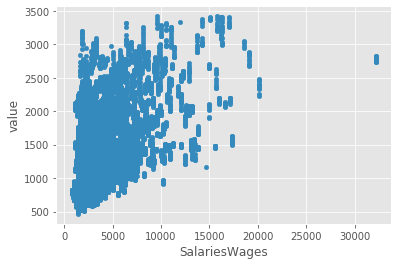

In [79]:
pd.concat([X_train['SalariesWages'], train['value']], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


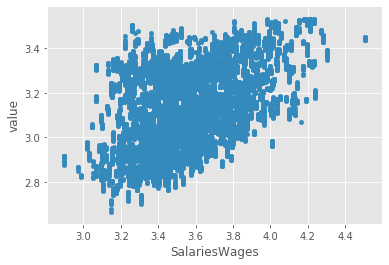

In [80]:
pd.concat([np.log10(X_train['SalariesWages']), np.log10(train['value'])], axis=1).plot(kind='scatter', x='SalariesWages', y='value')


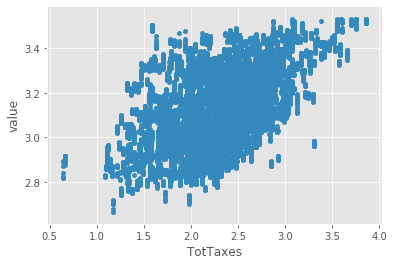

In [81]:
pd.concat([np.log10(X_train['TotTaxes']), np.log10(train['value'])], axis=1).plot(kind='scatter', x='TotTaxes', y='value')


In [82]:
print('Income_per_capita Mean: ', np.mean(zri.income_per_capita))
print('Income_per_capita Median: ', (zri.income_per_capita).median())

upper_lim = np.mean(zri.income_per_capita) + 3 * np.std(zri.income_per_capita)
lower_lim = np.mean(zri.income_per_capita) - 3 * np.std(zri.income_per_capita)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

Income_per_capita Mean:  33525.0622542709
Income_per_capita Median:  28892.0
Outliers are above 85180.28 and below -18130.15


In [83]:
print('TotTaxes Mean: ', np.mean(zri.TotTaxes))
print('TotTaxes Median: ', (zri.TotTaxes).median())

upper_lim = np.mean(zri.TotTaxes) + 3 * np.std(zri.TotTaxes)
lower_lim = np.mean(zri.TotTaxes) - 3 * np.std(zri.TotTaxes)
print('Outliers are above %.2f and below %.2f' % (upper_lim, lower_lim))

TotTaxes Mean:  321.8605143370388
TotTaxes Median:  170.46751387841155
Outliers are above 2174.57 and below -1530.85


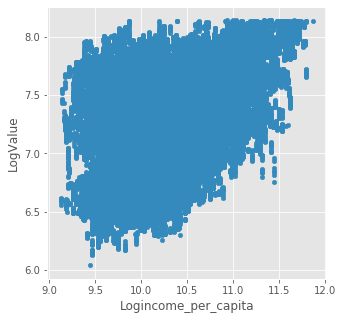

In [84]:
zri.plot(kind="scatter",     # Create a scatterplot
              x="Logincome_per_capita",          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5))

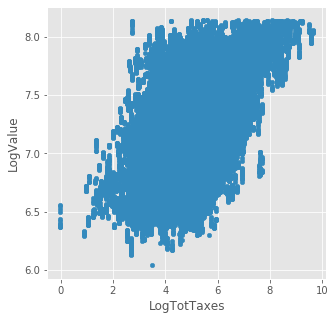

In [85]:
zri.plot(kind="scatter",     # Create a scatterplot
              x="LogTotTaxes",          # Put carat on the x axis
              y="LogValue",          # Put price on the y axis
              figsize=(5,5))